In [1]:
%matplotlib widget

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gen_data import get_data, fit

In [29]:
d = get_data(25)
d

<xarray.DataArray (control: 25, time: 4112)>
array([[ 2.15731349,  1.98614463,  2.03077117, ...,  0.08654629,
         0.17376546,  0.06871454],
       [ 2.11042939,  2.03541806,  1.9056938 , ..., -0.05298524,
         0.00467219, -0.03406168],
       [ 2.00142516,  1.87279376,  1.95544744, ...,  0.1555345 ,
         0.11736695,  0.04981069],
       ...,
       [ 2.0232323 ,  1.96807077,  1.97194159, ..., -0.00329359,
        -0.00469341, -0.00701131],
       [ 1.95426612,  2.05814638,  2.01996465, ..., -0.0076683 ,
         0.07544083, -0.05114735],
       [ 2.06901039,  2.04878724,  1.95941487, ..., -0.00769893,
         0.03714132,  0.01001797]])
Coordinates:
  * control  (control) float64 15.0 15.62 16.25 16.88 ... 28.12 28.75 29.38 30.0
  * time     (time) float64 0.0 0.007642 0.01528 0.02293 ... 31.4 31.41 31.42

In [5]:
fig, ax = plt.subplots()

for m in d:
    ax.plot(m)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

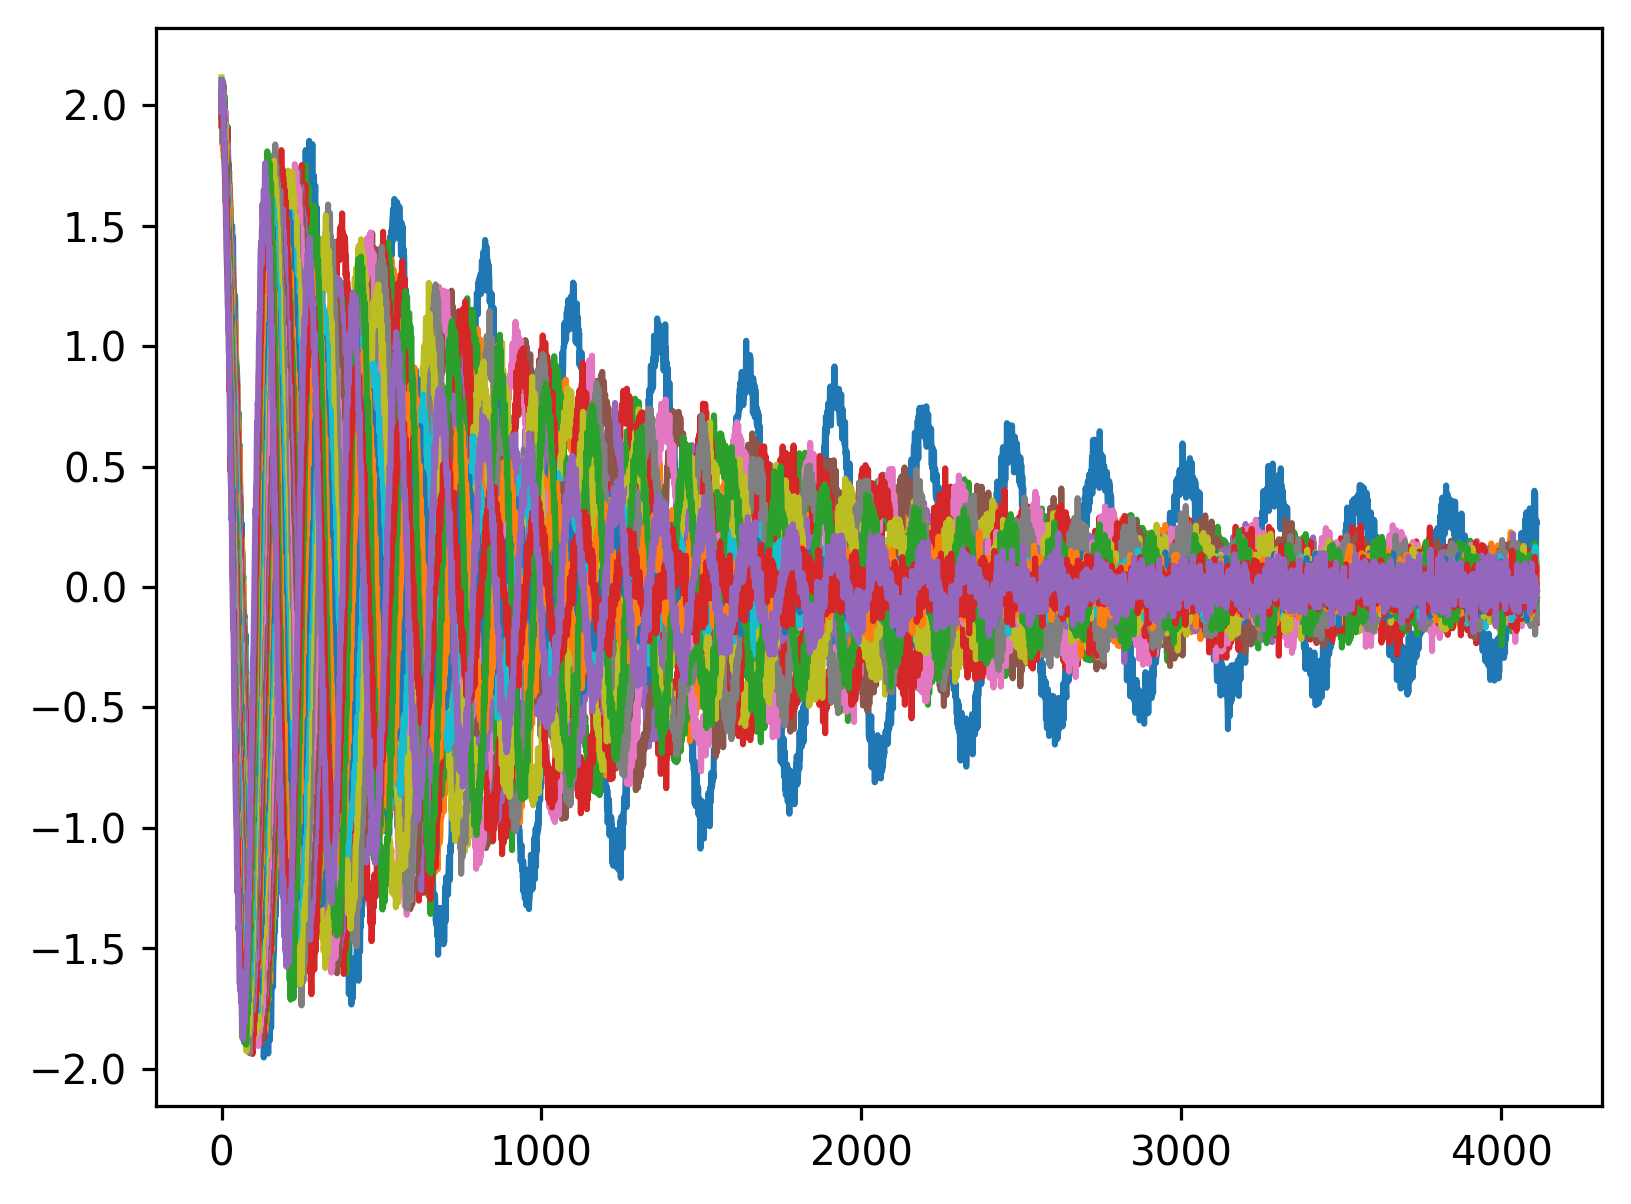

In [6]:
fig

In [10]:
fig, ax = plt.subplots()

control = float(m.coords["control"])
t = m.coords["time"]
z = m.values
(ln,) = ax.plot(t, z, label=f"C: {control:.1f}")
ax.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

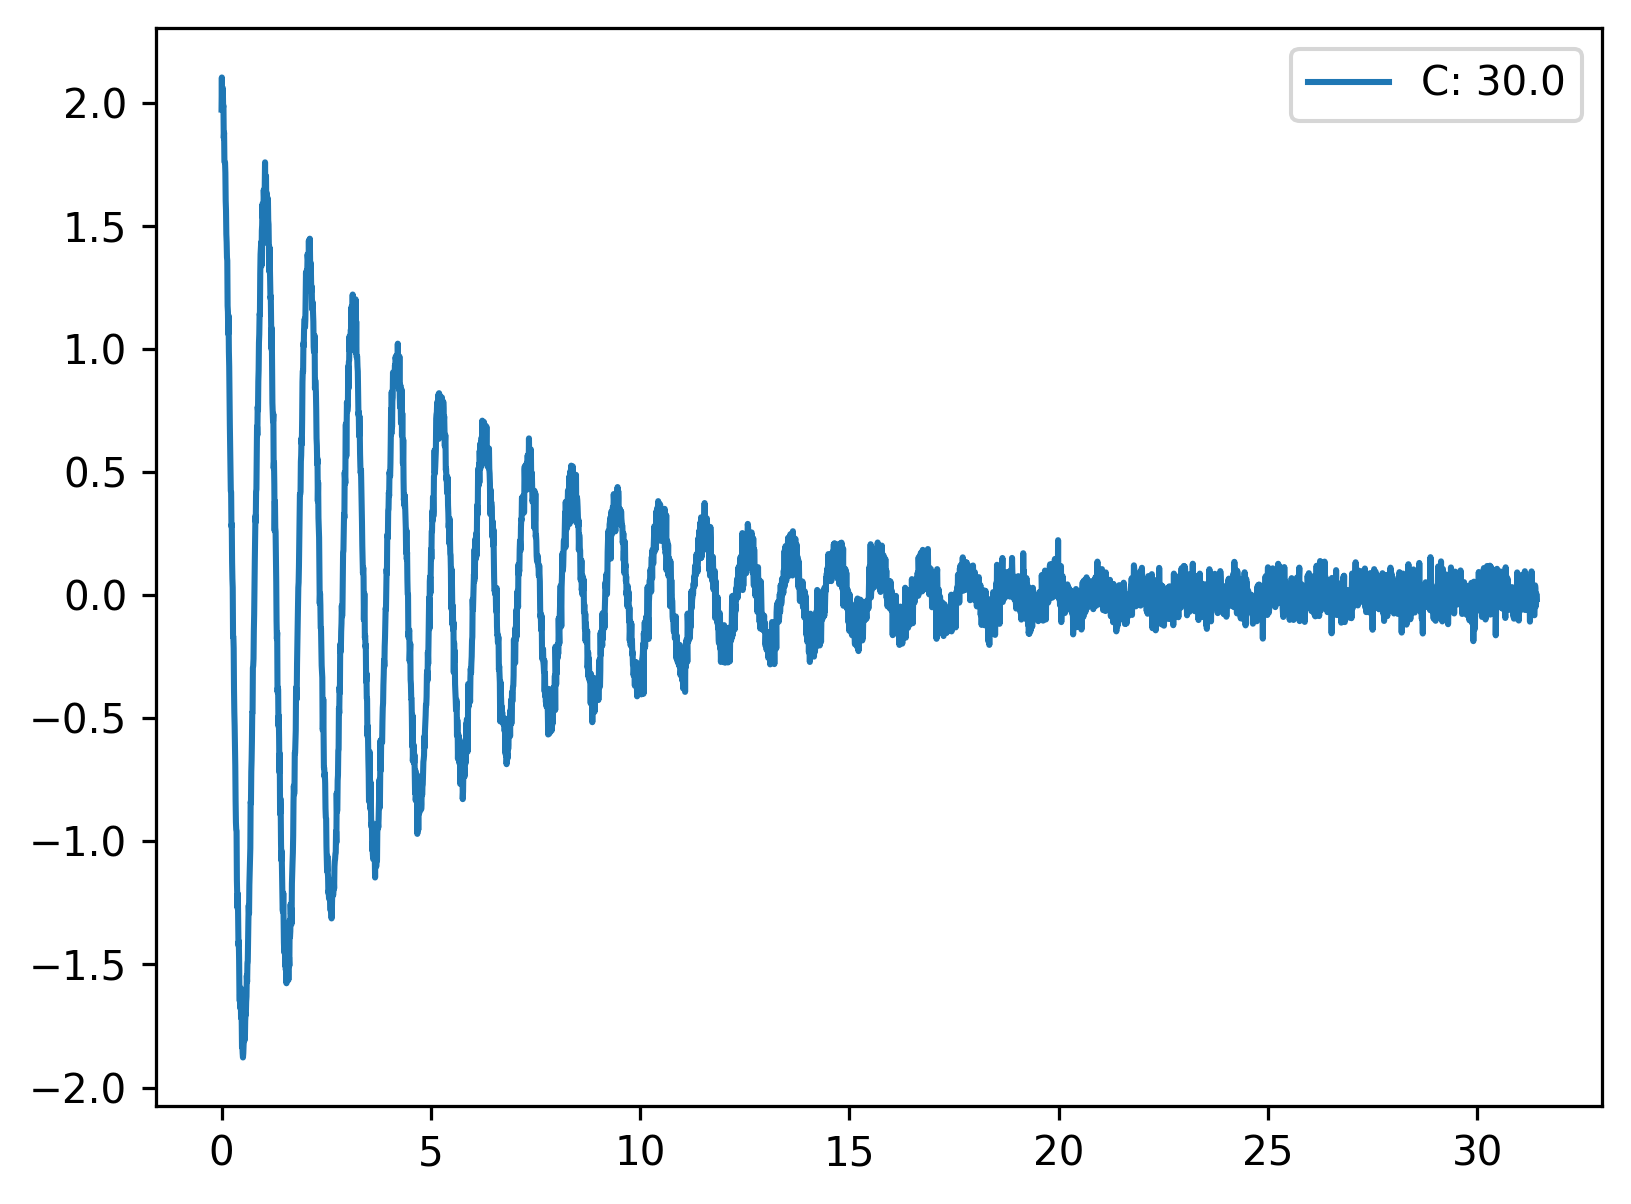

In [11]:
fig

In [12]:
def plot_one(ax, m):
    # pull what we want out of the xarray
    control = float(m.coords["control"])
    t = m.coords["time"]
    z = m.values

    (ln,) = ax.plot(t, z, label=f"C: {control:.1f}")

    return {"raw": ln}


In [13]:
fig, ax = plt.subplots()
plot_one(ax, d[0])
plot_one(ax, d[-1])
ax.legend()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

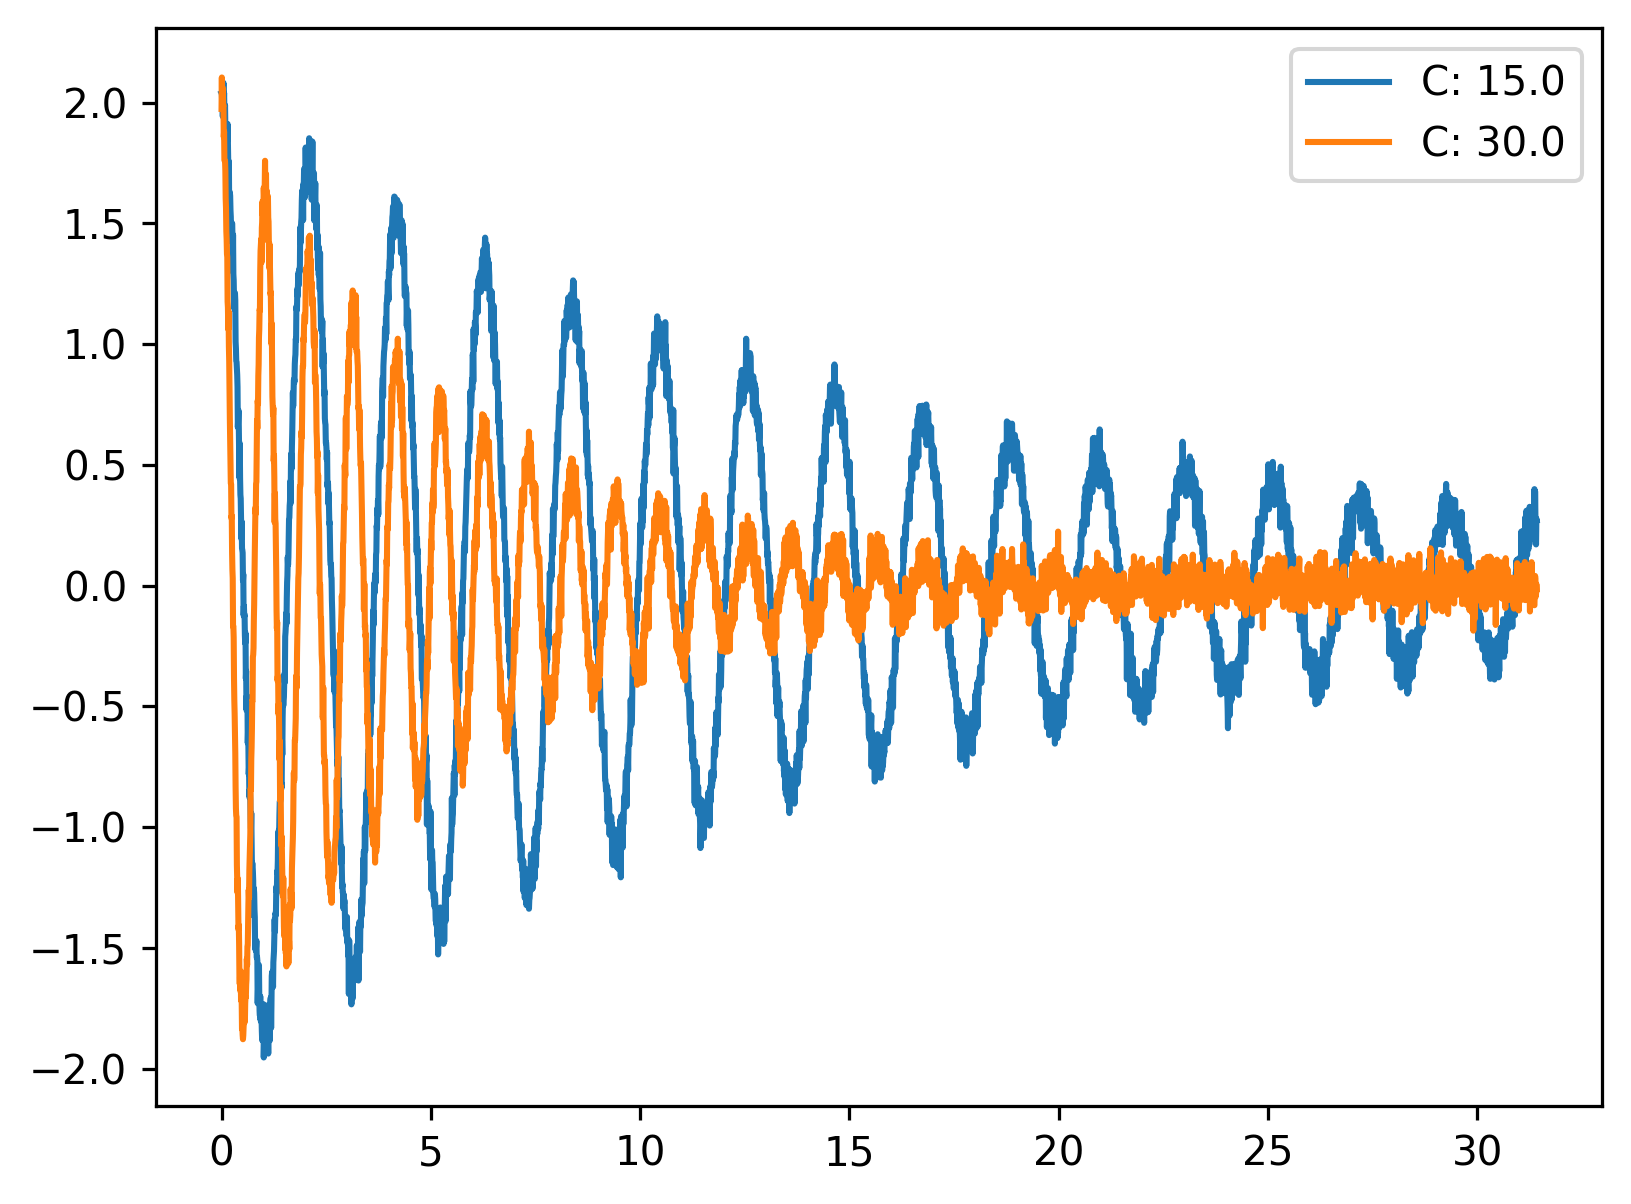

In [14]:
fig

In [15]:
def plot_one(ax, m, offset=0):
    # pull what we want out of the xarray
    control = float(m.coords["control"])
    t = m.coords["time"]
    z = m.values

    (ln,) = ax.plot(t, z + offset, label=f"C: {control:.1f}")

    return {"raw": ln}

In [16]:
fig, ax = plt.subplots()
plot_one(ax, d[0])
plot_one(ax, d[10], offset=4)
plot_one(ax, d[20], offset=8)
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

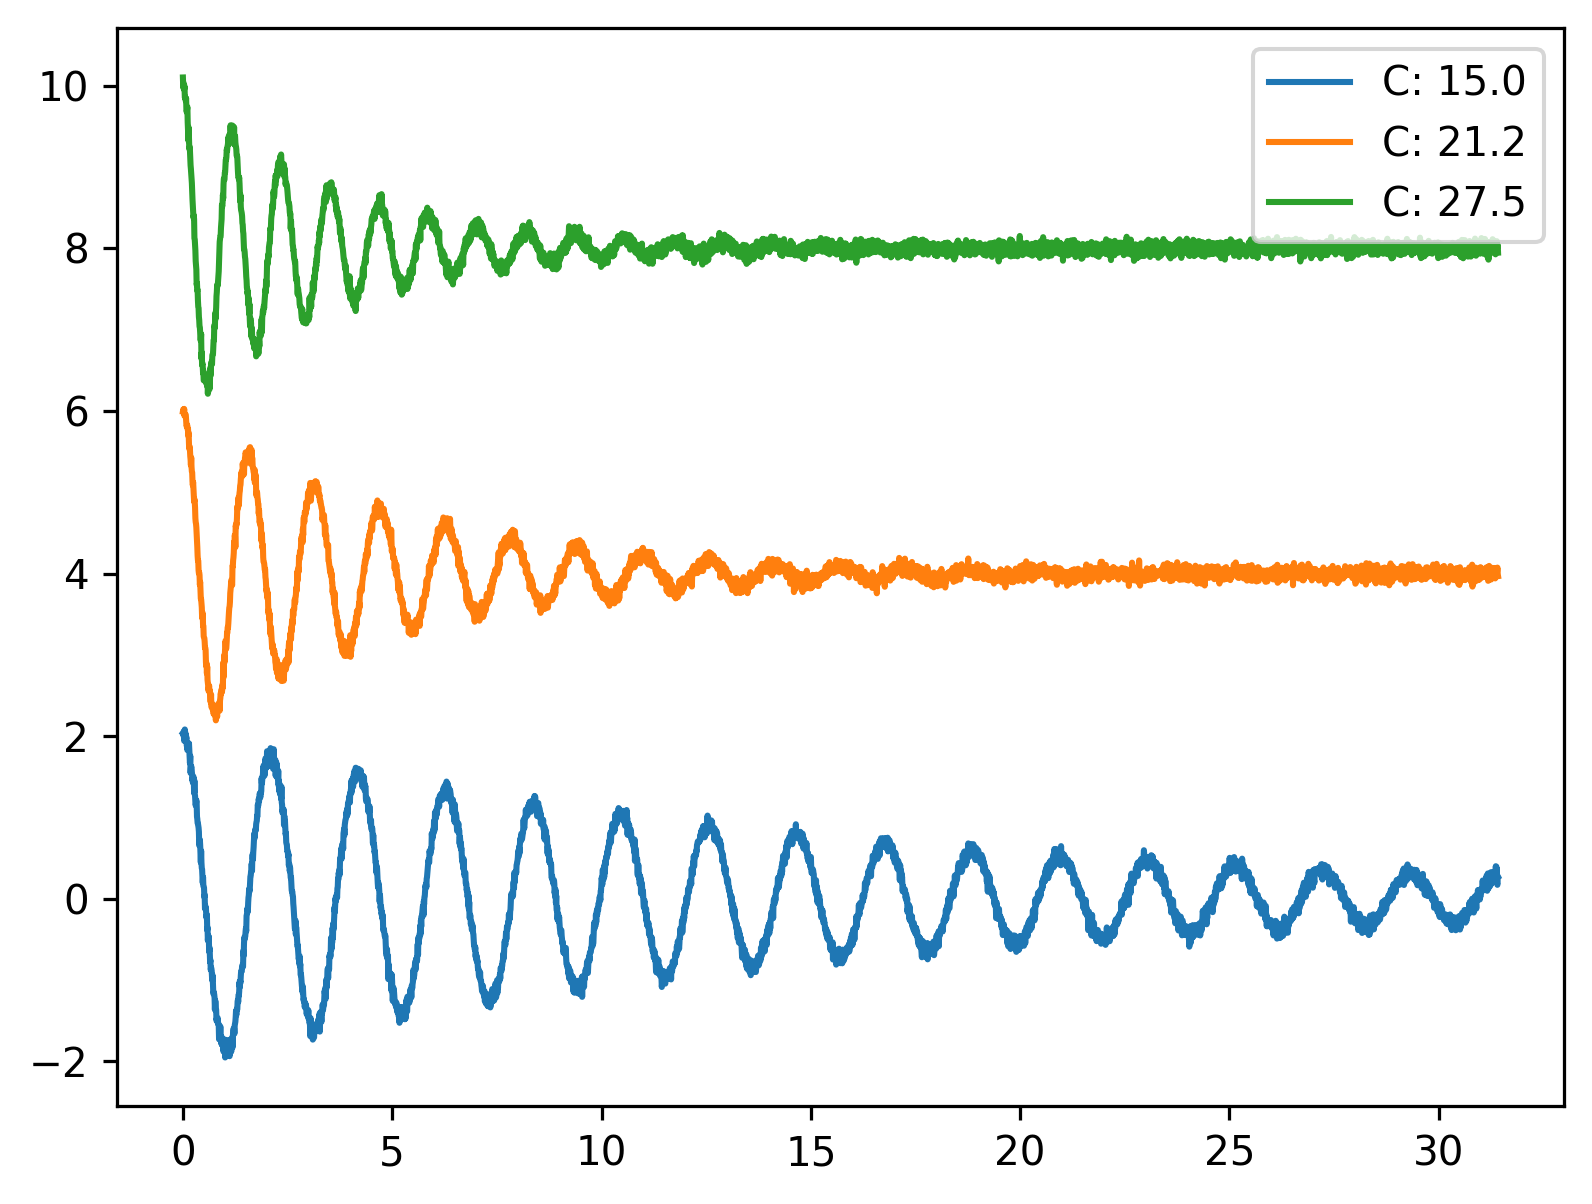

In [17]:
fig

In [22]:
popt = fit(d[0])

In [22]:
print(repr(popt))           # default repr
print(popt)                 # our custom __str__
print(popt._repr_latex_())  # see output of custom _repr_latex_
display(popt)               # explicitly pass to display (which invokes and renders _reper_latex_)
popt                        # implicitly call display  

Params(A=2.0009201457662344, zeta=0.05706744546951605, omega=2.999707805542974, phi=1.5706904309346128)
(A=2.00, ζ=0.06, ω0=3.00, φ=1.57)
$(A=2.00, \zeta=0.06, \omega_0=3.00,\varphi=1.57)$


Params(A=2.0009201457662344, zeta=0.05706744546951605, omega=2.999707805542974, phi=1.5706904309346128)

Params(A=2.0009201457662344, zeta=0.05706744546951605, omega=2.999707805542974, phi=1.5706904309346128)

In [24]:
def plot_one(ax, m, popt, offset=0):
    # pull what we want out of the xarray
    control = float(m.coords["control"])
    t = m.coords["time"]
    z = m.values

    (ln,) = ax.plot(t, z + offset, label=f"C: {control:.1f}")
    (fit,) = ax.plot(t, popt.sample(t) + offset, color="k")
    ann = ax.annotate(
        popt._repr_latex_(),
        # units are (axes-fraction, data)
        xy=(0.95, offset + 0.5),
        xycoords=ax.get_yaxis_transform(),
        # set the text alignment
        ha="right",
        va="bottom",
    )
    return {"raw": ln, "fit": fit, "annotation": ann}

In [25]:
fig, ax = plt.subplots()
plot_one(ax, d[0], fit(d[0]))
plot_one(ax, d[10], fit(d[10]), offset=4)
plot_one(ax, d[20], fit(d[20]), offset=8)
ax.legend(ncol=3, loc="upper center")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
 def plot_several(ax, d):
    out = []

    for j, m in enumerate(d):
        popt = fit(m)
        arts = plot_one(ax, m, popt, offset=3.75 * j)
        out.append(arts)

    ax.set_xlabel("time (ms)")
    ax.set_ylabel("displacement (mm)")

    return out


In [27]:

fig, ax = plt.subplots()

plot_several(ax, d[[0, 10, 20, 24]])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[{'raw': <matplotlib.lines.Line2D at 0x7fe3ab342be0>,
  'fit': <matplotlib.lines.Line2D at 0x7fe3ab31d970>,
  'annotation': Text(0.95, 0.5, '$(A=2.00, \\zeta=0.06, \\omega_0=3.00,\\varphi=1.57)$')},
 {'raw': <matplotlib.lines.Line2D at 0x7fe3ab342a90>,
  'fit': <matplotlib.lines.Line2D at 0x7fe3a96d6130>,
  'annotation': Text(0.95, 4.25, '$(A=2.00, \\zeta=0.05, \\omega_0=4.01,\\varphi=1.57)$')},
 {'raw': <matplotlib.lines.Line2D at 0x7fe3a96d6370>,
  'fit': <matplotlib.lines.Line2D at 0x7fe3a96dc880>,
  'annotation': Text(0.95, 8.0, '$(A=2.00, \\zeta=0.03, \\omega_0=5.36,\\varphi=1.57)$')},
 {'raw': <matplotlib.lines.Line2D at 0x7fe3a96dc2e0>,
  'fit': <matplotlib.lines.Line2D at 0x7fe3a9691130>,
  'annotation': Text(0.95, 11.75, '$(A=2.00, \\zeta=0.05, \\omega_0=6.00,\\varphi=1.57)$')}]

In [32]:
fits = [fit(m) for m in d]
fits_df = pd.DataFrame(fits, index=d.coords["control"])

fits_df.plot()

fig, (ax1, ax2) = plt.subplots(2)

ax1.set_ylabel(r"$\zeta$")
ax1.set_xlabel("control (arb)")
ax1.set_ylim(0, 0.08)
ax1.plot(fits_df["zeta"], marker="o", color="k", label="\N{greek small letter zeta}")
ax1.legend()

ax2.set_ylabel(r"$\omega_0/2\pi$ (kHz)")
ax2.set_xlabel("control (arb)")
ax2.set_ylim(0.25, 1.25)
ax2.plot(
    fits_df["omega"] / (2 * np.pi),
    marker="o",
    color="k",
    label="\N{greek small letter omega}",
)
ax2.legend()


def _plot_zeta(ax, fits_df):
    ax.set_ylabel(r"$\zeta$")
    ax.set_xlabel("control (arb)")
    ax.set_ylim(0, 0.08)
    return ax.plot(
        fits_df["zeta"], marker="o", color="k", label="\N{greek small letter zeta}"
    )


def _plot_omega(ax, fits_df):
    ax.set_ylabel(r"$\omega_0/2\pi$ (kHz)")
    ax.set_xlabel("control (arb)")
    ax.set_ylim(0.25, 1.25)
    return ax.plot(
        fits_df["omega"] / (2 * np.pi),
        marker="o",
        color="k",
        label="\N{greek small letter omega}",
    )


fig, (ax1, ax2) = plt.subplots(1, 2)
_plot_omega(ax1, fits_df)
_plot_zeta(ax2, fits_df)


fig, ax_dict = plt.subplot_mosaic(
    """
AB
AC
""",
    constrained_layout=True,
)

_plot_omega(ax_dict["B"], fits_df)
_plot_zeta(ax_dict["C"], fits_df)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [44]:

def subfigure_label(ax, text):
    ann = ax.annotate(
        text,
        # units are (axes-fraction, axes-fraction)
        # this is bottom right
        xy=(1, 0),
        xycoords="axes fraction",
        # units are absolute offset in points from xy
        xytext=(-5, 5),
        textcoords=("offset points"),
        # set the text alignment
        ha="right",
        va="bottom",
        fontweight="bold",
        fontsize="larger",
    )
    return ann

def plot_one(ax, m, popt, offset=0):
    # pull what we want out of the xarray
    control = float(m.coords["control"])
    t = m.coords["time"]
    z = m.values

    (ln,) = ax.plot(t, z + offset, label=f"C: {control:.1f}")
    (fit,) = ax.plot(t, popt.sample(t) + offset, color="k", linestyle='--')
    ann = ax.annotate(
        f"$C={control:.1f}$\n$\\zeta={popt.zeta:.2g}$ $\\omega_0={popt.omega:.2f}$",
        # units are (axes-fraction, data)
        xy=(0.95, offset + 0.5),
        xycoords=ax.get_yaxis_transform(),
        # set the text alignment
        ha="right",
        va="bottom",
    )
    return {"raw": ln, "fit": fit, "annotation": ann}

def _plot_several(ax, d, fits):
    out = []

    for j, (m, popt) in enumerate(zip(d, fits)):
        arts = plot_one(ax, m, popt, offset=3.75 * j)
        out.append(arts)

    ax.set_xlabel("time (ms)")
    ax.set_ylabel("displacement (mm)")

    return out


def paper_figure_2(fig, layout, d, fits, *, plot_every=5):
    ax_dict = fig.subplot_mosaic(layout)
    assert set(ax_dict) == set("ABC")

    fits_df = pd.DataFrame(fits, index=d.coords["control"])

    index = list(range(0, len(d), plot_every))

    artists = {
        "vibrations": _plot_several(ax_dict["A"], d[index], [fits[i] for i in index]),
        "zeta": _plot_zeta(ax_dict["B"], fits_df),
        "omega": _plot_omega(ax_dict["C"], fits_df),
    }

    fig.align_ylabels(list(ax_dict.values()))
    subplot_labels = {
        k: subfigure_label(v, f"({k.lower()})") for k, v in ax_dict.items()
    }

    return (fig, ax_dict, artists, subplot_labels)



In [45]:
paper_figure_2(plt.figure(constrained_layout=True), "ABC", d, fits, plot_every=5)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(<Figure size 640x480 with 3 Axes>,
 {'B': <AxesSubplot:label='B', xlabel='control (arb)', ylabel='$\\zeta$'>,
  'A': <AxesSubplot:label='A', xlabel='time (ms)', ylabel='displacement (mm)'>,
  'C': <AxesSubplot:label='C', xlabel='control (arb)', ylabel='$\\omega_0/2\\pi$ (kHz)'>},
 {'vibrations': [{'raw': <matplotlib.lines.Line2D at 0x7fe39e740910>,
    'fit': <matplotlib.lines.Line2D at 0x7fe39e740f40>,
    'annotation': Text(0.95, 0.5, '$C=15.0$\n$\\zeta=0.03$ $\\omega_0=3.00$')},
   {'raw': <matplotlib.lines.Line2D at 0x7fe39e746400>,
    'fit': <matplotlib.lines.Line2D at 0x7fe39e746b20>,
    'annotation': Text(0.95, 4.25, '$C=18.1$\n$\\zeta=0.046$ $\\omega_0=3.46$')},
   {'raw': <matplotlib.lines.Line2D at 0x7fe39e746c10>,
    'fit': <matplotlib.lines.Line2D at 0x7fe39e74e580>,
    'annotation': Text(0.95, 8.0, '$C=21.2$\n$\\zeta=0.049$ $\\omega_0=4.01$')},
   {'raw': <matplotlib.lines.Line2D at 0x7fe39e74ea00>,
    'fit': <matplotlib.lines.Line2D at 0x7fe39e74ee50>,
    'annotati

In [48]:
single_col_width = 8.6 / 2.54  # single column APS figure
double_col_width = 17.8 / 2.54  # double column APS figure


layout = """
AB
AC
"""

fig, axs, arts, labels = paper_figure_2(
    plt.figure(
        constrained_layout=True, figsize=(double_col_width, double_col_width * 0.5)
    ),
    layout,
    d,
    fits,
    plot_every=5,
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

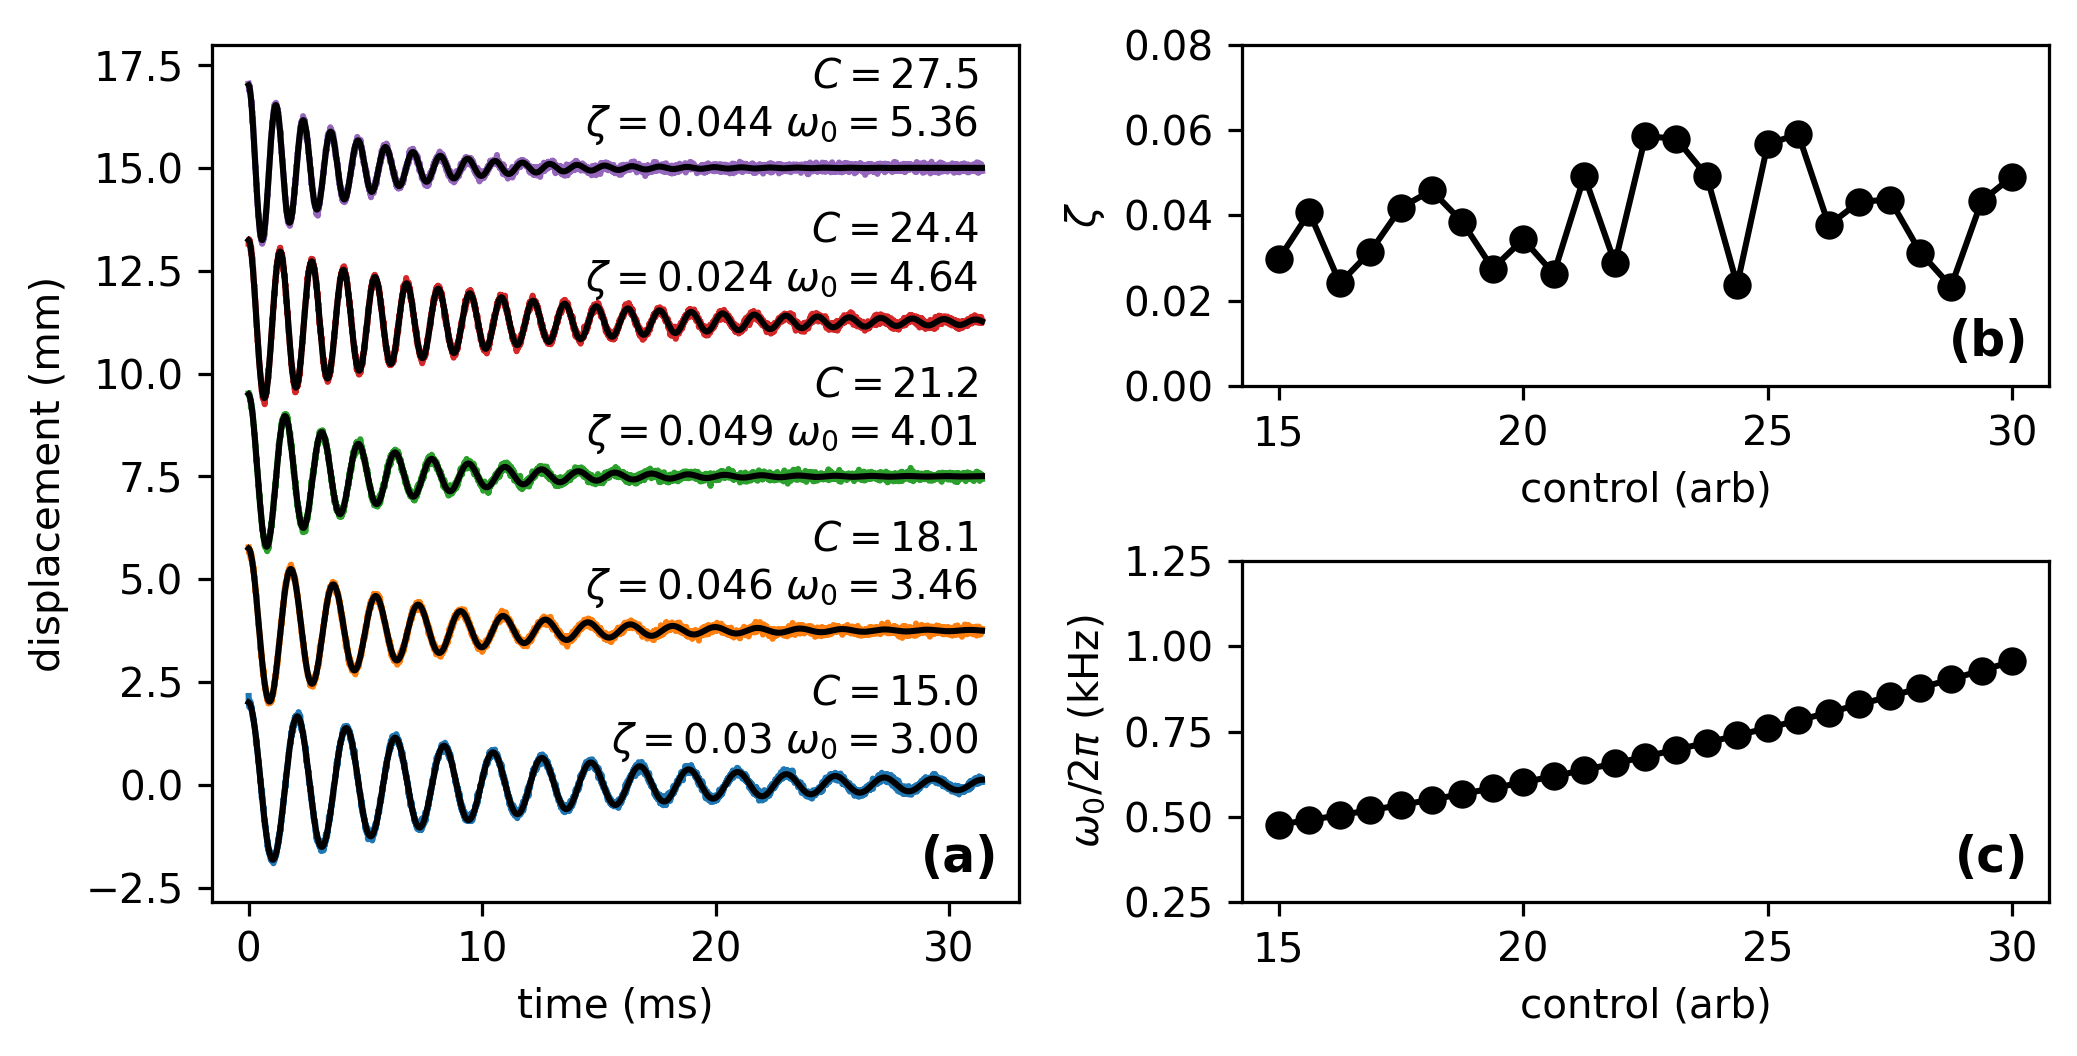

In [43]:
fig